https://www.kaggle.com/krishanudb/basic-computation-graph-using-pytorch  

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
# Defining the Hyperparameters
input_size = 1
output_size = 1
num_epochs = 10000
learning_rate = 0.001

In [3]:
# Defining a Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [5]:
# Linear Regression Model
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# Training the Model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print("Epoch: {}/{}; \tLoss: {}".format(epoch + 1, num_epochs, loss.item()))

Epoch: 1000/10000; 	Loss: 0.1699303239583969
Epoch: 2000/10000; 	Loss: 0.1695225089788437
Epoch: 3000/10000; 	Loss: 0.1692786067724228
Epoch: 4000/10000; 	Loss: 0.16913264989852905
Epoch: 5000/10000; 	Loss: 0.1690453439950943
Epoch: 6000/10000; 	Loss: 0.16899307072162628
Epoch: 7000/10000; 	Loss: 0.16896182298660278
Epoch: 8000/10000; 	Loss: 0.1689431369304657
Epoch: 9000/10000; 	Loss: 0.16893194615840912
Epoch: 10000/10000; 	Loss: 0.1689252406358719


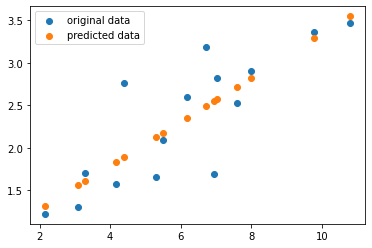

In [7]:
# Plotting the outputs
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.scatter(x_train, y_train, label='original data')
plt.scatter(x_train, predicted, label='predicted data')
plt.legend()
plt.show()

In [10]:
# Logistic Regression Model
# Defining Hyperparameters
input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [11]:
# loding the Dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train = False, transform=transforms.ToTensor(), download=True)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


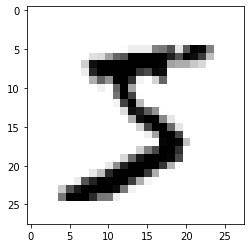

In [13]:
plt.imshow(train_dataset.train_data[0], cmap='gray_r');

In [14]:
# Create DataLoader objects
trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [15]:
model = nn.Linear(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
# Training the Model
total_step = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 200 == 0:
            print("Epoch: {}/{}, \tIteration: {}/{}, \tLoss: {}".format(epoch + 1, num_epochs, i + 1, len(trainloader), loss.item()))

Epoch: 1/20, 	Iteration: 200/600, 	Loss: 2.104520559310913
Epoch: 1/20, 	Iteration: 400/600, 	Loss: 1.9826343059539795
Epoch: 1/20, 	Iteration: 600/600, 	Loss: 1.8069018125534058
Epoch: 2/20, 	Iteration: 200/600, 	Loss: 1.7149571180343628
Epoch: 2/20, 	Iteration: 400/600, 	Loss: 1.5796902179718018
Epoch: 2/20, 	Iteration: 600/600, 	Loss: 1.3905000686645508
Epoch: 3/20, 	Iteration: 200/600, 	Loss: 1.352664589881897
Epoch: 3/20, 	Iteration: 400/600, 	Loss: 1.3142096996307373
Epoch: 3/20, 	Iteration: 600/600, 	Loss: 1.259871006011963
Epoch: 4/20, 	Iteration: 200/600, 	Loss: 1.2251907587051392
Epoch: 4/20, 	Iteration: 400/600, 	Loss: 1.1554583311080933
Epoch: 4/20, 	Iteration: 600/600, 	Loss: 1.0980323553085327
Epoch: 5/20, 	Iteration: 200/600, 	Loss: 1.1192119121551514
Epoch: 5/20, 	Iteration: 400/600, 	Loss: 1.0442242622375488
Epoch: 5/20, 	Iteration: 600/600, 	Loss: 1.0401078462600708
Epoch: 6/20, 	Iteration: 200/600, 	Loss: 0.8784672021865845
Epoch: 6/20, 	Iteration: 400/600, 	Loss: 0.

In [17]:
# Testing the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
    print("Accuracy of the model: {}".format(float(correct) / float(total)))

Accuracy of the model: 0.8653333333333333


In [18]:
# Feed Forward Neural Network Model
# Defining the network parameters
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [19]:
# Create DataLoader Objects
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle = True)

In [20]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
# Model definition
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return out

In [24]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 200 == 0:
            print("Epoch: {}/{};\tIteration: {}/{}; Loss: {}".format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

Epoch: 1/20;	Iteration: 200/600; Loss: 2.262850761413574
Epoch: 1/20;	Iteration: 400/600; Loss: 2.2144739627838135
Epoch: 1/20;	Iteration: 600/600; Loss: 2.172609806060791
Epoch: 2/20;	Iteration: 200/600; Loss: 2.116544246673584
Epoch: 2/20;	Iteration: 400/600; Loss: 2.0764412879943848
Epoch: 2/20;	Iteration: 600/600; Loss: 1.9877212047576904
Epoch: 3/20;	Iteration: 200/600; Loss: 1.9398133754730225
Epoch: 3/20;	Iteration: 400/600; Loss: 1.8850815296173096
Epoch: 3/20;	Iteration: 600/600; Loss: 1.7898401021957397
Epoch: 4/20;	Iteration: 200/600; Loss: 1.6916694641113281
Epoch: 4/20;	Iteration: 400/600; Loss: 1.6672512292861938
Epoch: 4/20;	Iteration: 600/600; Loss: 1.6237313747406006
Epoch: 5/20;	Iteration: 200/600; Loss: 1.5764994621276855
Epoch: 5/20;	Iteration: 400/600; Loss: 1.455335259437561
Epoch: 5/20;	Iteration: 600/600; Loss: 1.436743140220642
Epoch: 6/20;	Iteration: 200/600; Loss: 1.3855292797088623
Epoch: 6/20;	Iteration: 400/600; Loss: 1.2550292015075684
Epoch: 6/20;	Iterat

In [26]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
print("Accuracy of the model {}".format(float(correct)/float(total)))

Accuracy of the model 0.8808
